# 🧠 Elevate Labs AI & ML Internship - Task 7: Support Vector Machines (SVM)

## 🎯 Objective
In this task, we apply **Support Vector Machines (SVM)** for binary classification using the Breast Cancer dataset.
You will:
- Understand the mathematics of SVM (margin maximization, hinge loss)
- Train SVM with Linear and RBF kernels
- Visualize decision boundaries
- Perform hyperparameter tuning with GridSearchCV
- Evaluate model with accuracy, classification report, confusion matrix
- Use cross-validation to validate model robustness

## 🛠️ Step 1: Import Libraries
First, we import all the required libraries for data generation, preprocessing, model building, and visualization.


In [5]:
# @title Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
sns.set(style='whitegrid')

## 📦 Import Libraries and Load Dataset


- Data manipulation (pandas, numpy)
- Visualization (matplotlib, seaborn)
- Machine Learning (sklearn)

## 📥 Step 2: Load and Explore Dataset
We use a synthetic dataset with two features so that we can visualize the decision boundary easily.\

In [6]:
# @title Load and Preview Data
# Assuming you are running this in Google Colab based on the previous cell
import pandas as pd
import io
from google.colab import files

# Upload CSV file from your local system (only works in Google Colab)
# This code block handles the file upload and loading into a DataFrame.
# Make sure you upload the correct 'data (2).csv' or 'data.csv' file.
uploaded = files.upload()

# Load the uploaded CSV file into DataFrame 'df'
# The key in the 'uploaded' dictionary will be the name of the file you uploaded.
# Adjust 'data (2).csv' if you uploaded a file with a different name.
# Using the first item in the dictionary is generally safe if only one file was uploaded.
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Basic info and preview
df.info()

Saving breast-cancer.csv to breast-cancer.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-n

The dataset contains 569 samples and 32 columns, including `id`, `diagnosis` (target), and 30 numeric features.

- `M` = Malignant (1), `B` = Benign (0)
- We'll use `radius_mean` and `texture_mean` as our 2D features for visualization.

## 🧼 Step 3: Preprocessing

In [7]:
# @title Encode Target and Select Features
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df[['radius_mean', 'texture_mean']].values
y = df['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

✔️ We encoded the target and scaled our 2D features for SVM training.

✔️ SVMs are sensitive to feature scales, so standardization is critical.

## 🧪 Step 4: Train SVM Models
We train two SVM models:
- A linear SVM, useful when the data is linearly separable.
- An SVM with a Radial Basis Function (RBF) kernel, which is effective in non-linear scenarios.

In [8]:
# @title Train SVM Linear and RBF
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC(C=1)

📌 Both Linear and RBF SVM models are trained.

- `C=1` controls the regularization.
- RBF kernel uses `gamma='scale'` to control influence radius.

## 📊 Step 5: Visualize Decision Boundaries
We plot the decision boundaries learned by each SVM model on the training data.

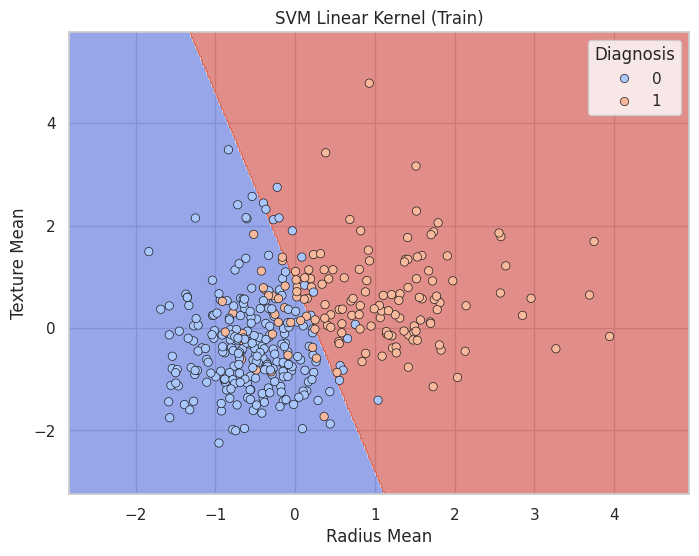

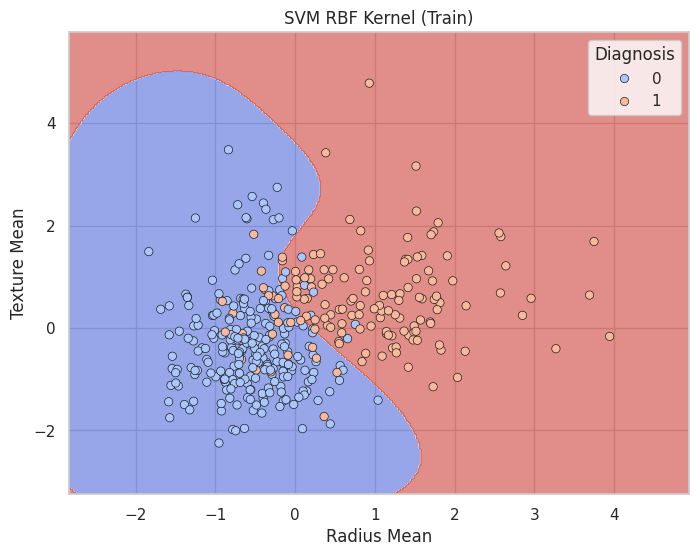

In [9]:
# @title Decision Boundary Function
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel('Radius Mean')
    plt.ylabel('Texture Mean')
    plt.legend(title='Diagnosis')
    plt.show()

plot_decision_boundary(svm_linear, X_train, y_train, 'SVM Linear Kernel (Train)')
plot_decision_boundary(svm_rbf, X_train, y_train, 'SVM RBF Kernel (Train)')

🧠 The linear kernel draws a straight boundary; the RBF kernel creates flexible, curved decision regions.
This shows how kernel choice influences model complexity.

## 🔍 Step 6: Hyperparameter Tuning (GridSearchCV)
We use grid search with 5-fold cross-validation to find the best values for `C` and `gamma`.

In [10]:
# @title GridSearchCV for RBF SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

🔎 `GridSearchCV` performs exhaustive search for the best hyperparameters.

- `C` controls margin width (lower C → wider margin)
- `gamma` controls kernel flexibility (higher → more complex boundary)

## 📈 Step 7: Evaluate on Test Set
We evaluate the best model from GridSearch using accuracy and a full classification report.

In [11]:
# @title Evaluation Metrics
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9122807017543859

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       108
           1       0.91      0.84      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



📊 The accuracy and classification report show precision, recall, and F1-score.
- High values indicate reliable performance.
- Useful to evaluate imbalanced classes like `M` vs `B`.

## 🔲 Step 8: Confusion Matrix
To ensure our model generalizes well, we compute cross-validation accuracy across the entire dataset.

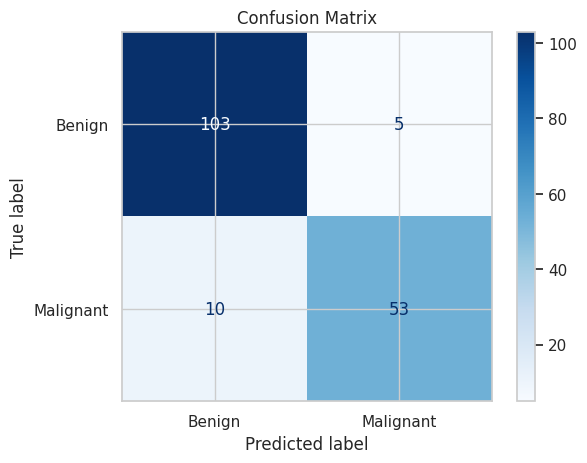

In [12]:
# @title Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

📌 The confusion matrix helps spot false positives and negatives:
- True Positive (TP): Malignant predicted as Malignant
- False Negative (FN): Malignant predicted as Benign (dangerous!)

## 🔁 Step 9: Cross-Validation

In [13]:
# @title Cross Validation Accuracy
scores = cross_val_score(best_model, X, y, cv=5)
print("CV Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

CV Scores: [0.85087719 0.86842105 0.92105263 0.93859649 0.89380531]
Mean CV Accuracy: 0.8945505356311132


✅ 5-fold cross-validation ensures the model generalizes well.
Consistent accuracy across folds indicates low variance.

## 📐 Appendix: How SVM Works

**Support Vector Machine Key Concepts:**

- **Margin Maximization**: SVM tries to find the widest margin between classes.
- **Support Vectors**: Only the closest points to the boundary affect the decision function.
- **Hinge Loss**: Penalizes misclassified or borderline samples: `max(0, 1 - y*f(x))`
- **Kernel Trick**: Maps data to higher dimensions without explicitly transforming it.

📌 In simple terms, SVM draws a line (or curve) that best separates two classes while being as far away from them as possible.

## ✅ Final Notes

- SVM with RBF kernel gave better flexibility than the linear kernel.
- Proper scaling and tuning made a significant difference.
- Visualization + metrics helped interpret results.
- For better performance, try using all 30 features.